<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_13_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation

In [255]:
import pandas as pd
import numpy as np

In [256]:
df=pd.read_excel('/content/heart_disease.xlsx')
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


EDA

In [257]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [259]:
df.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


In [260]:
df.isnull()

,age,Age in years
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Missing Values

In [261]:
print(df.dtypes)


age             object
Age in years    object
dtype: object


In [262]:
df.isnull().sum()

,0
age,0
Age in years,0


In [263]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


removing the unwanted Columns

In [264]:
df = df.drop(columns=[
    'Age in years_ecg observation at resting condition, -- Value 0: normal\n -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n -- Value 2: showing probable or definite left ventricular hypertrophy by Estes\' criteria\tAge in years_exercise i',
    'Age in years_maximum heart rate achieved'
], errors='ignore')

one_hot

In [265]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [266]:
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))



EDA

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

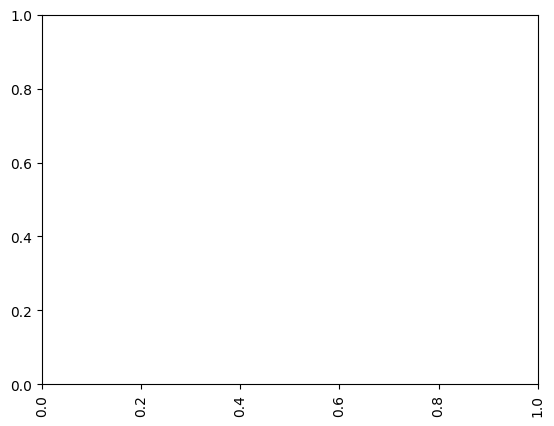

In [268]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Colleration

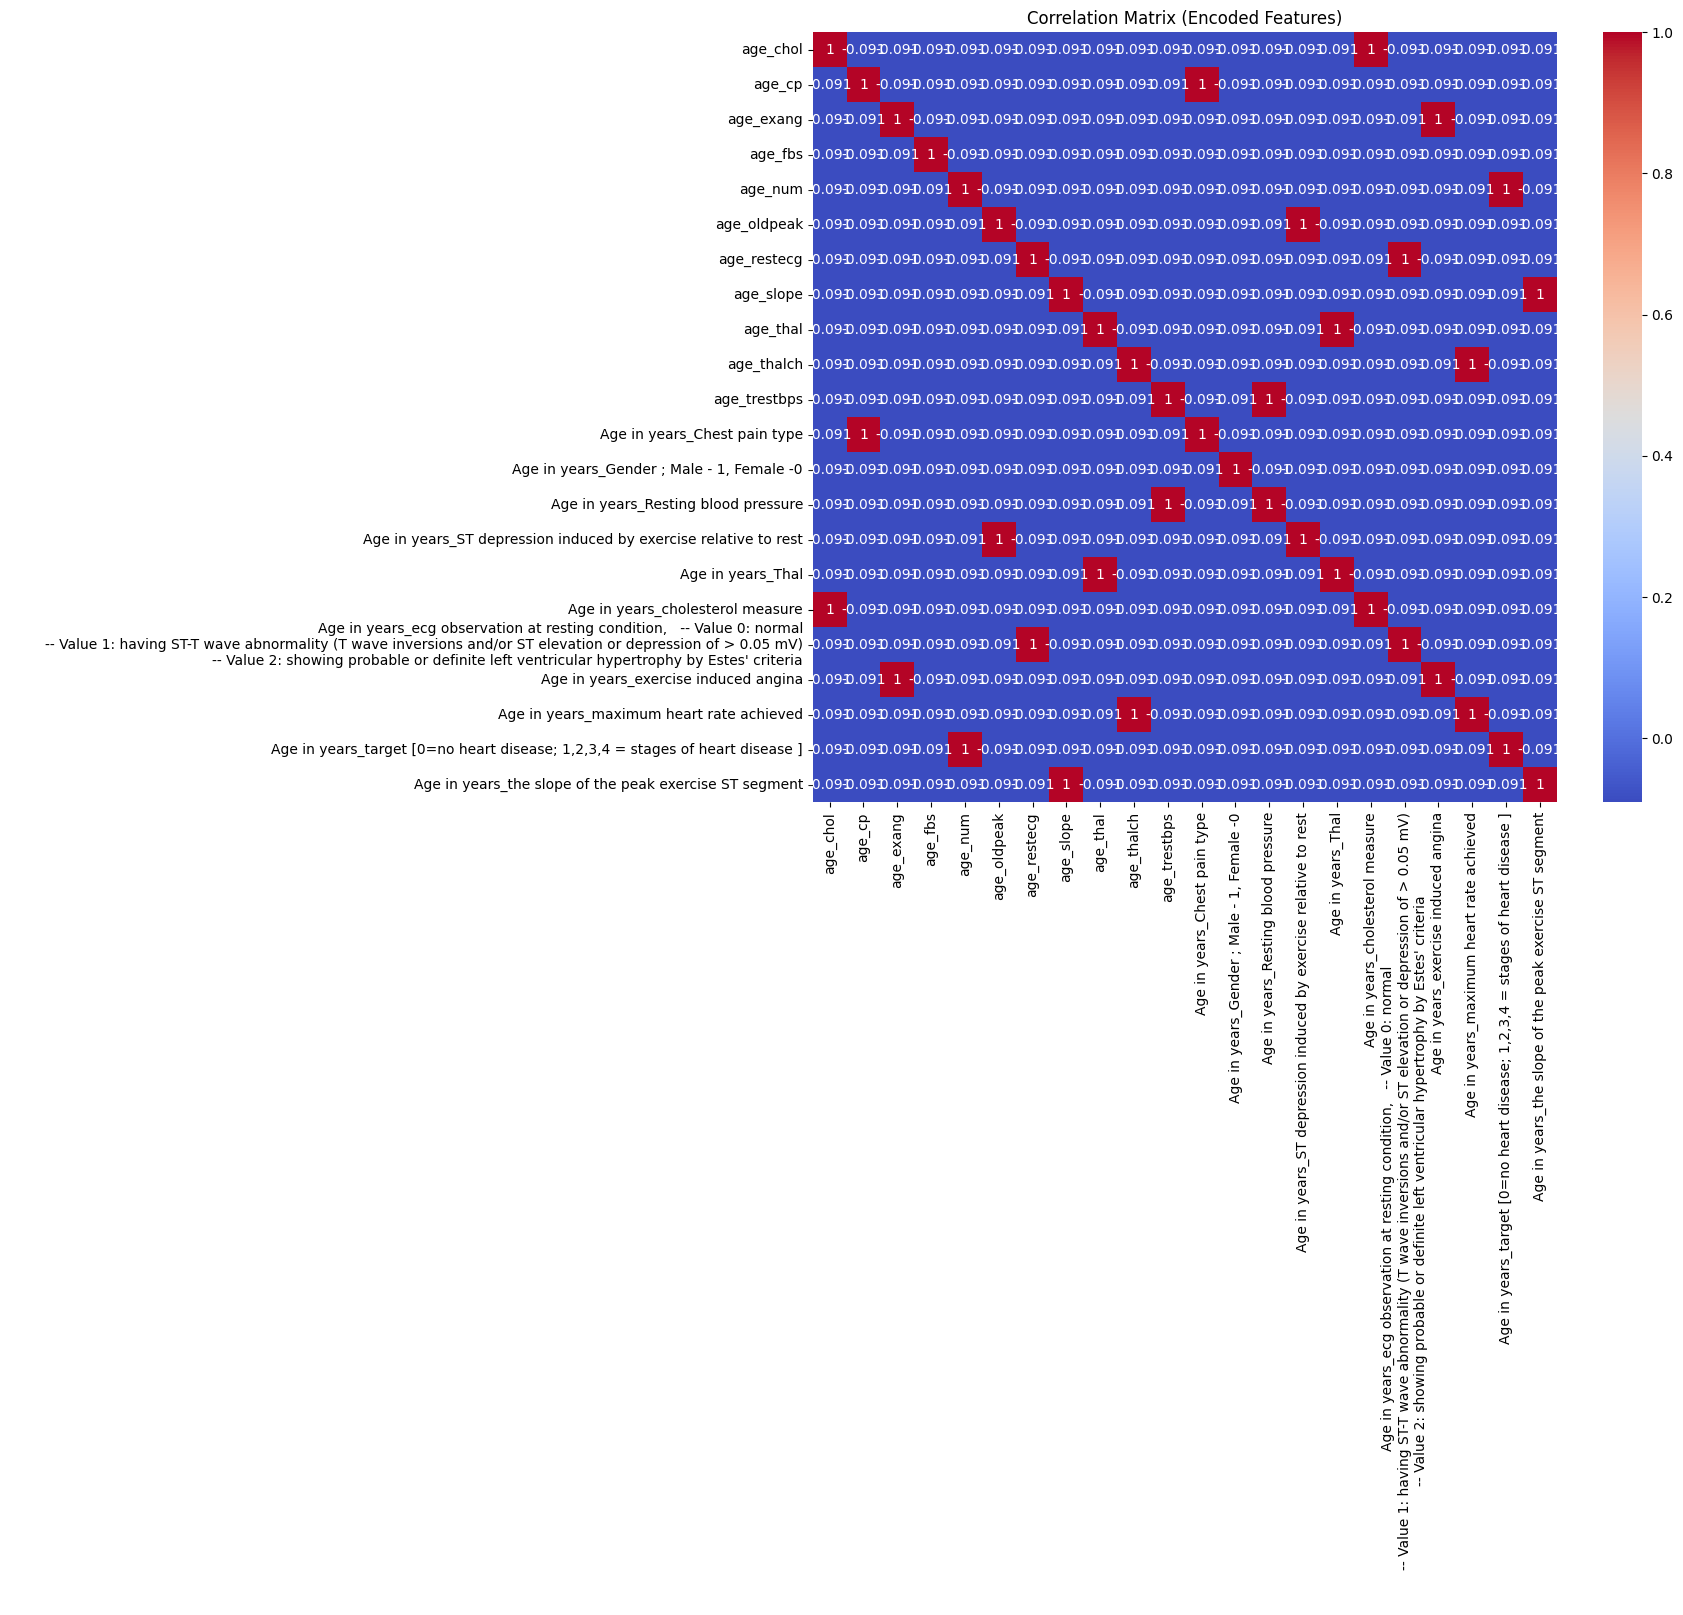

In [269]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Encoded Features)")
plt.show()

**Feature Engineering**

Handle Categorical Variables

In [270]:
df = pd.get_dummies(df, drop_first=True)


In [271]:
df = df.fillna(df.median())

Feature Scaling

Encoding

In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


**Decision Tree Classification**

Split Dataset

In [273]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [274]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Age in years_target [0=no heart disease; 1,2,3,4 = stages of heart disease ]', axis=1)
y = df_encoded['Age in years_target [0=no heart disease; 1,2,3,4 = stages of heart disease ]']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training Model

In [275]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluate

In [276]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [277]:
accuracy

1.0

In [278]:
print("Precision:", precision_score(y_test, y_pred))

Precision: 0.0


In [279]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.0


In [280]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.0


In [281]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

ROC-AUC: nan


Hyperparameter Tuning

In [282]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


** Visualize and Analyze**

Visualize Tree

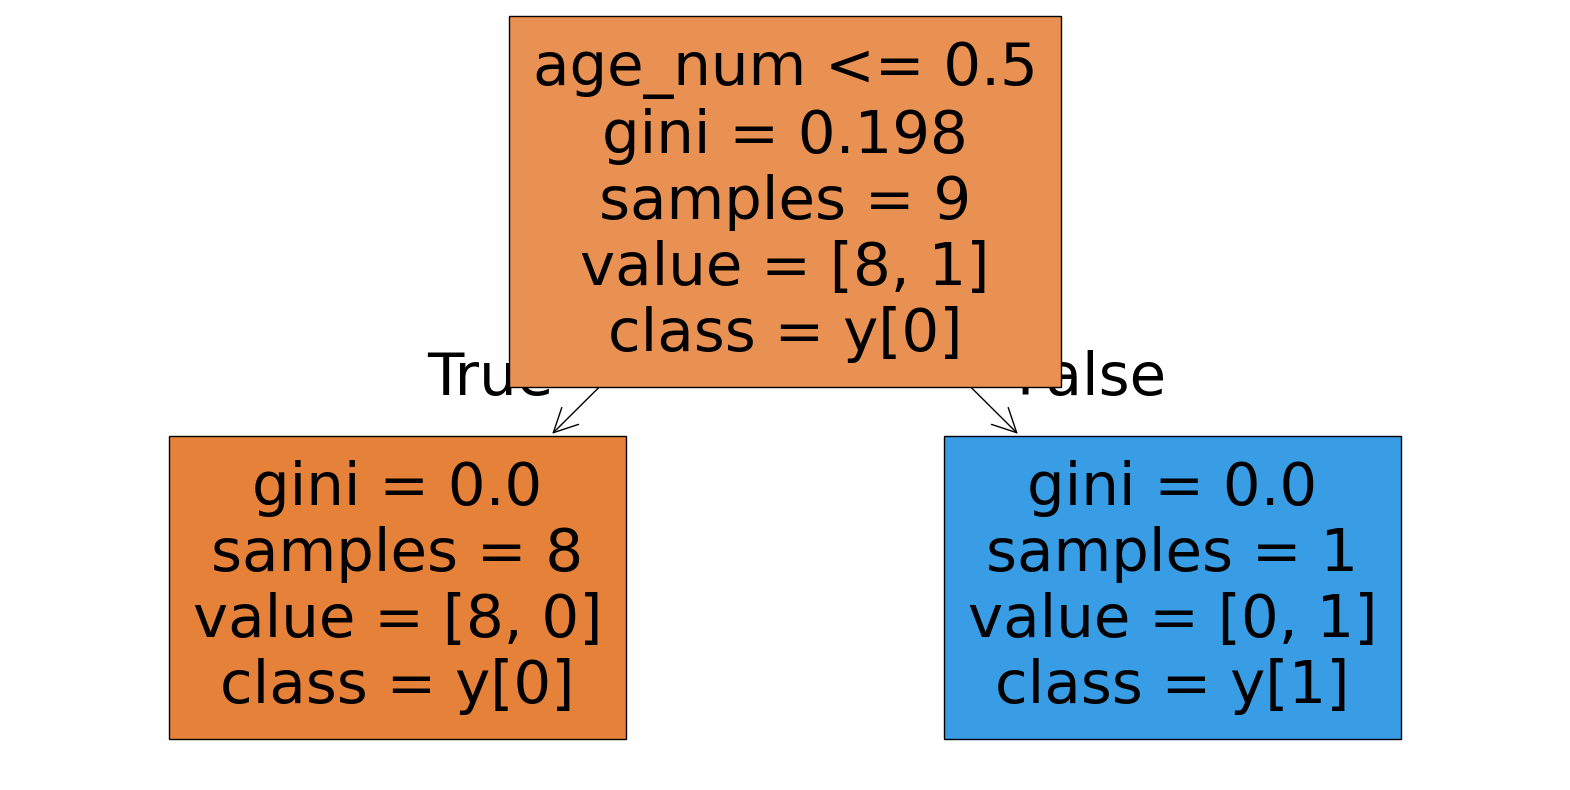

In [283]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(grid.best_estimator_, feature_names=X.columns, class_names=True, filled=True)
plt.show()

**Feature Importance**

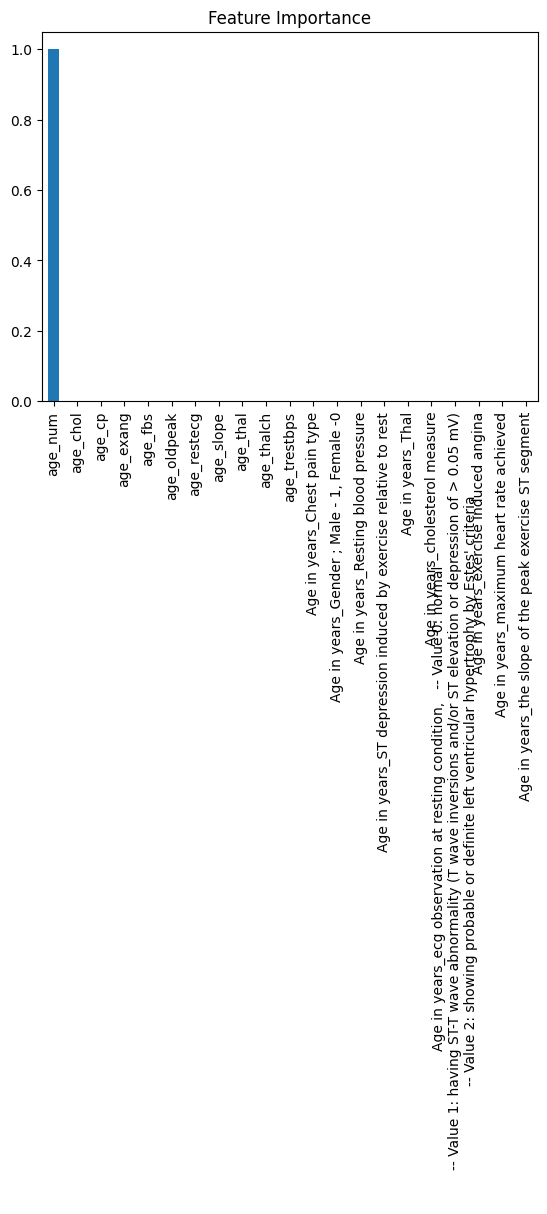

In [284]:
importances = pd.Series(grid.best_estimator_.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()